# Assumptions for linear regression:
1. Linear relationship - Linear regression needs linear relationship b/w Independent variable(x) and dependent variable(y).
2. Normality - Linear regression requires all the variables to be normally distributed. The error term is also should be ND. There should be no outliers in the data because Linear regresion is sensitive to outliers.
3. Multi-collinearity There should be very little or no multi-collinearity in the data. MC happens when the IV are too highly corelated with eachother. there are different methods to measure MC. They are as follows:
- Correlation matrix/ Heatmap
- Tolerance 
- VIF(variance inflation factor)
4. Homoscedasticity - The error terms must have constant variance wrt the regression lines. This phenomenon is called as Homoscedasticity. The presence of non constant variables refered as heteroscedasticity.
5. Autocorrelation - There should be no correlation b/w the error terms. Absence of correlation is called as autocorelation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('car-mpg_students.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
df.drop('car_name',axis = 1,inplace = True)

In [4]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [5]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


In [7]:
df['origin'] = df['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [8]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,America,0
1,15.0,8,350.0,165,3693,11.5,70,America,0
2,18.0,8,318.0,150,3436,11.0,70,America,0
3,16.0,8,304.0,150,3433,12.0,70,America,0
4,17.0,8,302.0,140,3449,10.5,70,America,0


In [9]:
df['origin'].value_counts()

America    249
Asia        79
Europe      70
Name: origin, dtype: int64

In [10]:
df = pd.get_dummies(df,columns = ['origin'])

In [11]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


<AxesSubplot:>

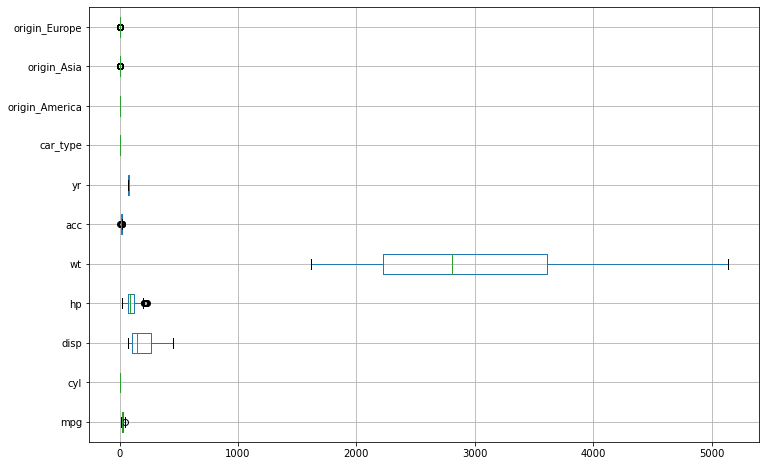

In [12]:
plt.figure(figsize = (12,8))
df.boxplot(vert=0)

In [13]:
#Replacing outliers 
def replace_outlier(mydf,col):
        Q1 = mydf[col].quantile(0.25)
        Q2 = mydf[col].quantile(0.5)
        Q3 = mydf[col].quantile(0.75)
        IQR = Q3-Q1
        LW = Q1 - 1.5*IQR
        UW = Q3 + 1.5*IQR
#         mydf.loc[(mydf[col] < LW),col] = Q2
#         mydf.loc[(mydf[col] > UW),col] = Q2
        mydf.loc[(mydf[col] < LW),col] = Q1
        mydf.loc[(mydf[col] > UW),col] = Q3
        return mydf

In [14]:
df = replace_outlier(df,'acc')

In [15]:
df = replace_outlier(df,'hp')

<AxesSubplot:>

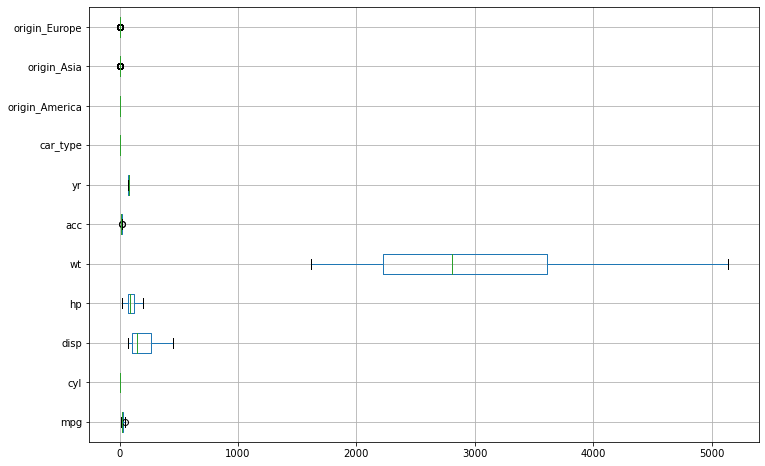

In [16]:
plt.figure(figsize = (12,8))
df.boxplot(vert = 0)

In [17]:
x = df.drop('mpg',axis = 1)
y = df['mpg']

In [18]:
x

,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,8,307.0,130,3504,12.000,70,0,1,0,0
1,8,350.0,165,3693,11.500,70,0,1,0,0
2,8,318.0,150,3436,11.000,70,0,1,0,0
3,8,304.0,150,3433,12.000,70,0,1,0,0
4,8,302.0,140,3449,10.500,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.600,82,1,1,0,0
394,4,97.0,52,2130,17.175,82,1,0,0,1
395,4,135.0,84,2295,11.600,82,1,1,0,0
396,4,120.0,79,2625,18.600,82,1,1,0,0


In [19]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
x_train

,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
350,4,105.0,63,2215,14.900,81,1,1,0,0
59,4,97.0,54,2254,17.175,72,1,0,0,1
120,4,121.0,112,2868,15.500,73,1,0,0,1
12,8,400.0,150,3761,9.500,70,0,1,0,0
349,4,91.0,68,1985,16.000,81,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.600,82,1,1,0,0
255,4,140.0,88,2720,15.400,78,1,1,0,0
72,8,304.0,150,3892,12.500,72,0,1,0,0
235,4,97.0,75,2265,18.200,77,1,0,1,0


In [22]:
x_test

,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
174,6,171.0,97,2984,14.5,75,0,1,0,0
359,4,141.0,80,3230,20.4,81,1,0,0,1
250,8,318.0,140,3735,13.2,78,0,1,0,0
274,5,131.0,103,2830,15.9,78,1,0,0,1
283,6,232.0,90,3265,18.2,79,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
382,4,108.0,70,2245,16.9,82,1,0,1,0
39,8,400.0,175,4464,11.5,71,0,1,0,0
171,4,134.0,96,2702,13.5,75,1,0,1,0
271,4,156.0,105,2745,16.7,78,1,1,0,0


In [23]:
y_train

350    34.7
59     23.0
120    19.0
12     15.0
349    34.1
       ... 
393    27.0
255    25.1
72     15.0
235    26.0
37     18.0
Name: mpg, Length: 278, dtype: float64

In [24]:
y_test

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
       ... 
382    34.0
39     14.0
171    24.0
271    23.2
247    39.4
Name: mpg, Length: 120, dtype: float64

## Model Building
- Model object creation
- Model fitting
- Model prediction
_ Model evaluation

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_pred

array([19.99118094, 27.62541599, 21.12757536, 28.3570814 , 22.42180165,
       16.58271555, 30.28661716, 35.1492214 , 19.06860832, 10.81730162,
       30.57018535, 18.97262508, 19.61164213, 26.76064407, 37.03466649,
       23.67054452,  9.5324004 , 18.82473879,  8.16492883, 33.41380321,
       25.88439021, 32.08024224, 19.34297519, 25.56288838, 25.74918759,
       30.23328588, 32.90278928, 33.44851012, 16.44918275, 30.12182132,
       25.07533438, 13.86489796, 21.3878914 , 28.63969593, 25.29556405,
       13.45434466, 27.13563513, 12.56451891, 32.20654272, 24.62204583,
       24.71377688, 25.02329774, 22.3753828 , 34.09665519, 23.99060348,
       20.23858615, 19.01529498, 12.23021201, 29.12196287, 17.0041304 ,
       24.76935915, 26.53406844, 17.82186873, 12.83147902, 28.89203049,
       25.04188695, 13.34752517, 13.71603908, 31.06581229, 36.33592732,
       36.08341536, 36.29477664, 19.0660765 , 25.72198179, 20.6823454 ,
       33.35031566, 24.71361032, 25.00800965, 30.00394151, 13.52

In [29]:
y_test

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
       ... 
382    34.0
39     14.0
171    24.0
271    23.2
247    39.4
Name: mpg, Length: 120, dtype: float64

In [30]:
r2_score(y_test,y_pred)

0.8516598303754555

In [31]:
mean_squared_error(y_test,y_pred)

8.672996044261682

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.9449950839112926

### K-Fold Cross validation

In [33]:
np.mean(cross_val_score(LinearRegression(),x,y,cv=10))

0.6775142567243393